**THIS KERNAL IS BLEND OF **
So awesome kernels present Right now 

**vote if you love blend**

1. https://www.kaggle.com/raghaw/ensemble-on-fire {already blended}
2. https://www.kaggle.com/vincentlugat/ieee-lgb-bayesian-opt/output {lgb+bayesian}
3. https://www.kaggle.com/ryches/keras-nn-starter-w-time-series-split/output {Keras NN}
4. https://www.kaggle.com/timon88/lgbm-baseline-small-fe-no-blend/output {lgbm+fe}

## phase 1 [Ensemble]




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

%matplotlib inline
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

ieee-blend
ieee-fraud-detection



In [2]:
sub1 = pd.read_csv('../input/ieee-blend/lgb_sub.csv')
sub2 = pd.read_csv('../input/ieee-blend/submission_IEEE (1).csv')
sub3 = pd.read_csv('../input/ieee-blend/submission_IEEE.csv')
sub4 = pd.read_csv('../input/ieee-blend/submission.csv')
temp=pd.read_csv('../input/ieee-blend/lgb_sub.csv')

**Hist Graph of scores**

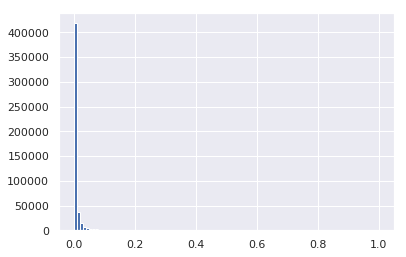

In [3]:
sns.set()
plt.hist(sub1['isFraud'],bins=100)
plt.show()

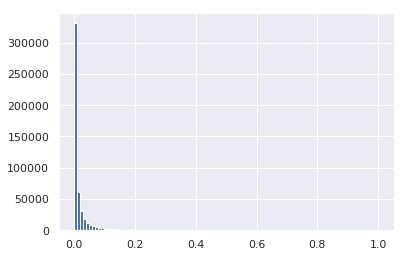

In [4]:
sns.set()
plt.hist(sub2['isFraud'],bins=100)
plt.show()

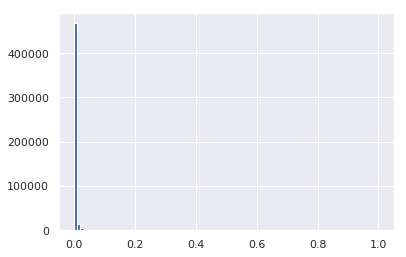

In [5]:
sns.set()
plt.hist(sub3['isFraud'],bins=100)
plt.show()

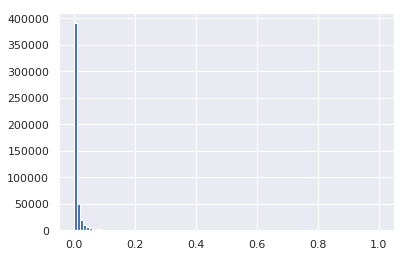

In [6]:
sns.set()
plt.hist(sub4['isFraud'],bins=100)
plt.show()

In [7]:
#temp['isFraud'] = 0.35*sub1['isFraud'] + 0.30*sub2['isFraud'] + 0.25*sub3['isFraud'] + 0.10*sub4['isFraud'] 
#temp.to_csv('submission8.csv', index=False )

In [8]:
temp['isFraud'] = 0.60*sub4['isFraud'] + 0.40*sub3['isFraud']
temp.to_csv('submission_p2_1.csv', index=False )

## phase 2 [Stacking]



In [9]:
sub_path = "../input/ieee-blend"
all_files = os.listdir(sub_path)
all_files

['lgb_sub.csv',
 'submission.csv',
 'submission_IEEE (1).csv',
 'submission_IEEE.csv']

In [10]:
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "ieee" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()
ncol = concat_sub.shape[1]

In [11]:
# check correlation
concat_sub.iloc[:,1:ncol].corr()

,ieee0,ieee1,ieee2,ieee3
ieee0,1.000000,0.989236,0.862600,0.972463
ieee1,0.989236,1.000000,0.877087,0.976163
ieee2,0.862600,0.877087,1.000000,0.857479
ieee3,0.972463,0.976163,0.857479,1.000000


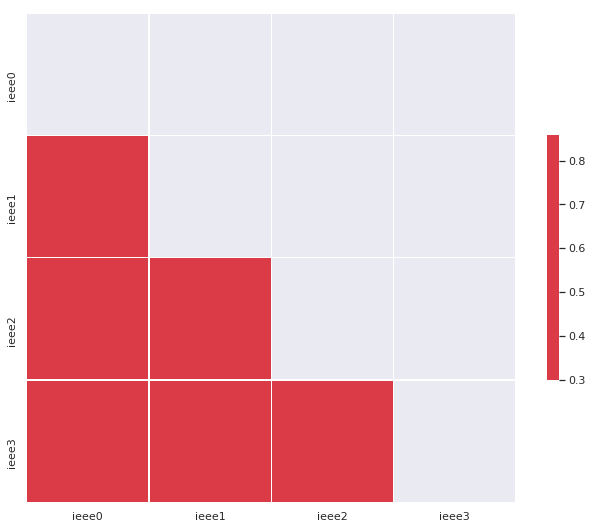

In [12]:
corr = concat_sub.iloc[:,1:7].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
# get the data fields ready for stacking
concat_sub['ieee_max'] = concat_sub.iloc[:, 1:ncol].max(axis=1)
concat_sub['ieee_min'] = concat_sub.iloc[:, 1:ncol].min(axis=1)
concat_sub['ieee_mean'] = concat_sub.iloc[:, 1:ncol].mean(axis=1)
concat_sub['ieee_median'] = concat_sub.iloc[:, 1:ncol].median(axis=1)

In [14]:
concat_sub.describe()

,TransactionID,ieee0,ieee1,ieee2,ieee3,ieee_max,ieee_min,ieee_mean,ieee_median
count,5.066910e+05,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000
mean,3.916894e+06,0.022757,0.025622,0.031531,0.017290,0.038097,0.013972,0.024300,0.022566
std,1.462692e+05,0.111319,0.111939,0.109611,0.106956,0.126103,0.091450,0.106724,0.109073
min,3.663549e+06,0.000108,0.000114,0.000000,0.000012,0.000128,0.000000,0.000068,0.000070
25%,3.790222e+06,0.001082,0.001513,0.000735,0.000287,0.002145,0.000214,0.001178,0.001011
50%,3.916894e+06,0.002363,0.003451,0.004247,0.000665,0.006201,0.000575,0.003167,0.002453
75%,4.043566e+06,0.006379,0.009051,0.017300,0.001899,0.020679,0.001665,0.009433,0.006891
max,4.170239e+06,0.998761,0.998628,0.999999,0.999561,0.999999,0.998067,0.998512,0.998499


In [15]:
cutoff_lo = 0.7
cutoff_hi = 0.3

In [16]:
concat_sub['isFraud'] = concat_sub['ieee_mean']
concat_sub[['TransactionID', 'isFraud']].to_csv('stack_mean.csv', 
                                        index=False, float_format='%.6f')

In [17]:
concat_sub['isFraud'] = concat_sub['ieee_median']
concat_sub[['TransactionID', 'isFraud']].to_csv('stack_median.csv', 
                                        index=False, float_format='%.6f')


In [18]:
concat_sub['isFraud'] = np.where(np.all(concat_sub.iloc[:,1:ncol] > cutoff_lo, axis=1), 1, 
                                    np.where(np.all(concat_sub.iloc[:,1:ncol] < cutoff_hi, axis=1),
                                             0, concat_sub['ieee_median']))
concat_sub[['TransactionID', 'isFraud']].to_csv('stack_pushout_median.csv', 
                                        index=False, float_format='%.6f')

In [19]:
concat_sub['isFraud'] = np.where(np.all(concat_sub.iloc[:,1:ncol] > cutoff_lo, axis=1), 
                                    concat_sub['ieee_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:ncol] < cutoff_hi, axis=1),
                                             concat_sub['ieee_min'], 
                                             concat_sub['ieee_mean']))
concat_sub[['TransactionID', 'isFraud']].to_csv('stack_minmax_mean.csv', 
                                        index=False, float_format='%.6f')

In [20]:
concat_sub['isFraud'] = np.where(np.all(concat_sub.iloc[:,1:ncol] > cutoff_lo, axis=1), 
                                    concat_sub['ieee_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:ncol] < cutoff_hi, axis=1),
                                             concat_sub['ieee_min'], 
                                             concat_sub['ieee_median']))
concat_sub[['TransactionID', 'isFraud']].to_csv('stack_minmax_median.csv', 
                                        index=False, float_format='%.6f')

In [21]:
sub_base = pd.read_csv('../input/ieee-blend/lgb_sub.csv')

In [22]:
concat_sub['ieee_base'] = sub_base['isFraud']
concat_sub['isFraud'] = np.where(np.all(concat_sub.iloc[:,1:ncol] > cutoff_lo, axis=1), 
                                    concat_sub['ieee_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:ncol] < cutoff_hi, axis=1),
                                             concat_sub['ieee_min'], 
                                             concat_sub['ieee_base']))
concat_sub[['TransactionID', 'isFraud']].to_csv('stack_minmax_bestbase.csv', 
                                        index=False, float_format='%.6f')

**submission_p2_1.csv tops the chart**
**vote if you love blend**